In [190]:
import numpy as np
from scipy import fft, optimize
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib notebook

In [191]:
def f(x, A, B):
    return A*(np.exp(x/B) - 1)
def g(x, A, B):
    return A + B*x

In [192]:
data = pd.read_csv('Dati1.csv', delimiter =';',decimal =',')

In [193]:
v_osc = np.array(data['V1 osc'], dtype = float)
v_mult = np.array(data['V2 mult'], dtype = float)
v_ge = np.array(data['V_G [mV]'], dtype = float)
i_ge = np.array(data['I_G [mA]'], dtype = float)
v_si = np.array(data['V_S [mV]'], dtype = float)
i_si = np.array(data['I_S [mA]'], dtype = float)

In [194]:
parV, covV = optimize.curve_fit(g, v_mult, v_osc, p0=[0, 1])
parV
parV_Ge, covV_Ge = optimize.curve_fit(f, v_ge, i_ge, p0=[0.001, 40])
parV_Ge
parV_Si, covV_Si = optimize.curve_fit(f, v_si,  i_si, p0=[0.001, 40])
parV_Si

array([1.41218918e-07, 4.34152210e+01])

<IPython.core.display.Javascript object>


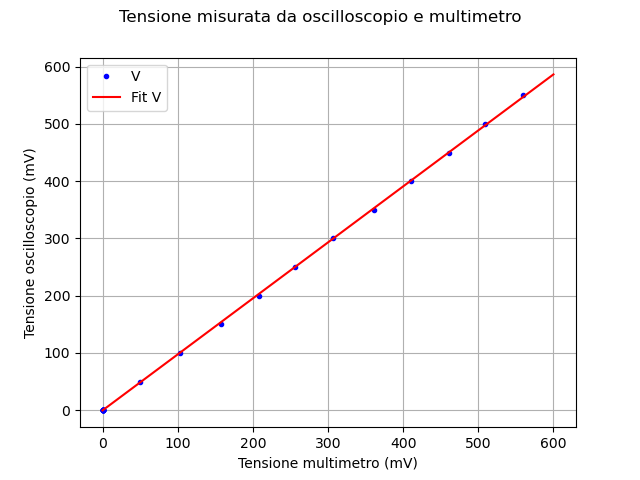

<IPython.core.display.Javascript object>


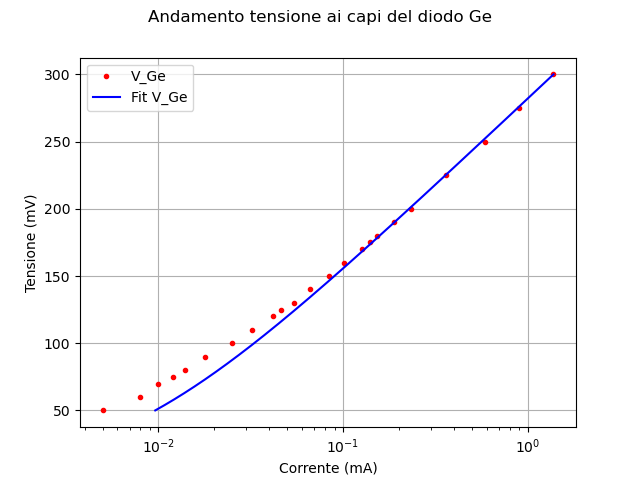

<IPython.core.display.Javascript object>


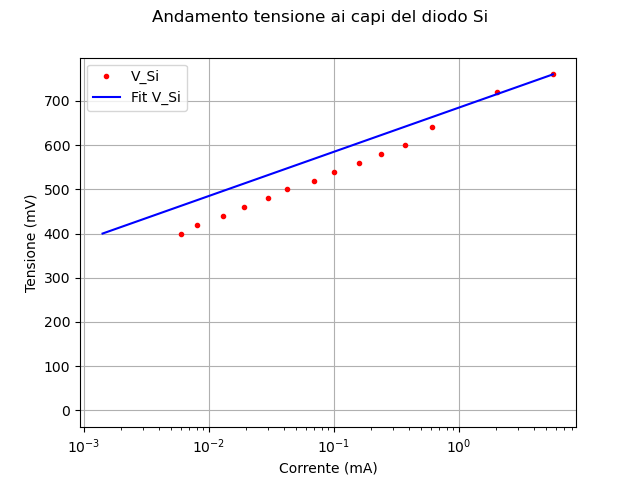

<IPython.core.display.Javascript object>


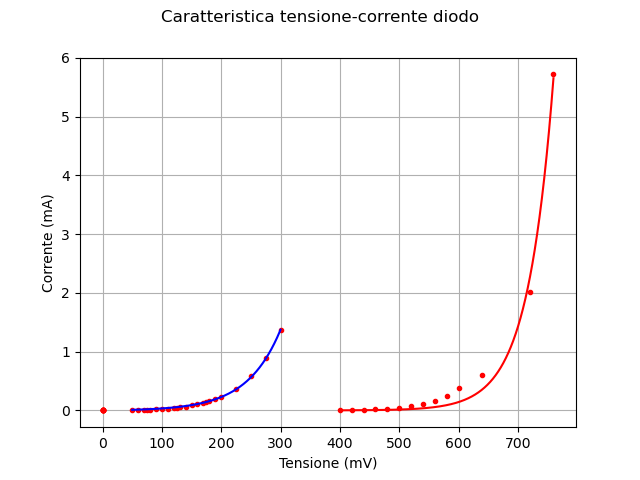

In [195]:
fig1 = plt.figure()
fig2 = plt.figure()
fig3 = plt.figure()
fig4 = plt.figure()
ax1 = fig1.add_subplot()
ax2 = fig2.add_subplot()
ax3 = fig3.add_subplot()
ax4 = fig4.add_subplot()
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
fig1.suptitle('Tensione misurata da oscilloscopio e multimetro')
fig2.suptitle('Andamento tensione ai capi del diodo Ge')
fig3.suptitle('Andamento tensione ai capi del diodo Si')
fig4.suptitle('Caratteristica tensione-corrente diodo')
ax1.set_xlabel('Tensione multimetro (mV)')
ax1.set_ylabel('Tensione oscilloscopio (mV)') 
ax2.set_xlabel('Corrente (mA)')
ax2.set_ylabel('Tensione (mV)')  
ax3.set_xlabel('Corrente (mA)')
ax3.set_ylabel('Tensione (mV)')
ax4.set_xlabel('Tensione (mV)')
ax4.set_ylabel('Corrente (mA)')
ax2.set_xscale("log")
ax3.set_xscale("log")
ax1.plot(v_mult, v_osc, '.', color= 'b', label='V')
ax2.plot(i_ge, v_ge, '.', color= 'r', label='V_Ge')
ax3.plot(i_si, v_si, '.', color= 'r', label='V_Si')
ax4.plot(v_ge, i_ge, '.', color= 'r', label='V_Ge')
ax4.plot(v_si, i_si, '.', color= 'r', label='V_Si')
ax1.plot(np.linspace(0,600,10000), g(np.linspace(0,600,10000),parV[0], parV[1]), color= 'r', label='Fit V')
ax2.plot(f(np.linspace(50,300,10000),parV_Ge[0], parV_Ge[1]), np.linspace(50,300,10000), color= 'b', label='Fit V_Ge')
ax3.plot(f(np.linspace(400,760,10000),parV_Si[0], parV_Si[1]), np.linspace(400,760,10000), color= 'b', label='Fit V_Si')
ax4.plot(np.linspace(50,300,10000), f(np.linspace(50,300,10000),parV_Ge[0], parV_Ge[1]), color= 'b', label='Fit V_Ge')
ax4.plot(np.linspace(400,760,10000),f(np.linspace(400,760,10000),parV_Si[0], parV_Si[1]), color= 'r', label='Fit V_Si')
ax1.legend()
ax2.legend()
ax3.legend()

In [196]:
start_offset = parV[0]
slope_offset = parV[1]
I_0_Ge =  parV_Ge[0]
etaV_T_Ge =  parV_Ge[1]
I_0_Si =  parV_Si[0]
etaV_T_Si =  parV_Si[1]


start_offset_err = np.sqrt(covV[0,0])
slope_offset_err = np.sqrt(covV[1,1])
I_0_Ge_err = np.sqrt(covV_Ge[0,0])
etaV_T_Ge_err = np.sqrt(covV_Ge[1,1])
I_0_Si_err = np.sqrt(covV_Si[0,0])
etaV_T_Si_err = np.sqrt(covV_Si[1,1])


print('Start offset:', start_offset, '+/-', start_offset_err)
print('Slope offset:', slope_offset, '+/-', slope_offset_err)
print('eta*V_T_Ge:', etaV_T_Ge, '+/-', etaV_T_Ge_err)
print('I_0_Ge:', I_0_Ge, '+/-', I_0_Ge_err)
print('eta*V_T_Si:', etaV_T_Si, '+/-', etaV_T_Si_err)
print('I_0_Si:', I_0_Si, '+/-', I_0_Si_err)

Start offset: -0.3793987891623937 +/- 0.41238473650943647
Slope offset: 0.9783920314991388 +/- 0.0017187495180905922
eta*V_T_Ge: 56.388718871028765 +/- 0.4972240510870214
I_0_Ge: 0.006755165955337961 +/- 0.0002993151313204735
eta*V_T_Si: 43.41522101638747 +/- 1.9593623379738454
I_0_Si: 1.4121891781428753e-07 +/- 1.1067467688583663e-07


In [197]:
fig1.savefig('V.pdf')
fig2.savefig('V_Ge.pdf')
fig3.savefig('V_Si.pdf')
fig4.savefig('V_diodi.pdf')